In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
100 * 2.5 + 50

300.0

In [4]:
log(1)

NameError: name 'log' is not defined

Without further imports, an error is raised.


In [3]:
import math
math.log(1)

0.0

After importing the math module, the calculation can be executed.


In [5]:
import numpy as np
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [16]:
help(list())

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [32]:
import math
import numpy as np

S0 = 100
K =105
T = 1.0
r =0.05
sigma = 0.2


In [33]:
I = 10000

In [34]:
np.random.seed(1000)

In [37]:
z = np.random.standard_normal(I)
z

array([-0.35253291, -0.07145103, -1.82736489, ...,  0.41597951,
        0.17166067, -0.07310489])

In [26]:
ST = S0 * np.exp((r-sigma ** 2/2)*T + sigma * math.sqrt(T)*z)
ST

In [27]:
hT = np.maximum(ST - K, 0)
hT

In [30]:
C0 = math.exp(-r*T)*np.mean(hT)
print(f'Value of the European call option: {C0}.') 


In [38]:
!pip install yfinance

You should consider upgrading via the 'C:\Users\Vishal\anaconda3\python.exe -m pip install --upgrade pip' command.


In [39]:
import numpy as np
import pandas as pd
import yfinance as yf

In [51]:
uber_data = yf.download(tickers='^NSEI', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [52]:
uber_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2022-07-08,16273.650391,16275.500000,16157.900391,16220.599609,16220.599609,281100
2022-07-11,16136.150391,16248.549805,16115.500000,16216.000000,16216.000000,255900
2022-07-12,16126.200195,16158.750000,16031.150391,16058.299805,16058.299805,208600


In [77]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

tickers = input("Enter the symbol of stock: ")
period = input("Enter the period you want to download (Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max): ")
interval = input("Enter the interval you want to download (Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo): ")
#Interval required 1 minute
data = yf.download(tickers=tickers, period=period, interval=interval)

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title=f'{tickers} live share price evolution',
    yaxis_title='Stock Price')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

Enter the symbol of stock: TTM
Enter the period you want to download (Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max): max
Enter the interval you want to download (Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo): 1d
[*********************100%***********************]  1 of 1 completed


In [66]:
import math
loops = 3000000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.43 s ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
import numpy as np
loops = 3000000
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

66.3 ms ± 584 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
import numexpr as ne
import numpy as np
loops = 3000000
a = np.arange(1, loops)
ne.set_num_threads(6)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

11.5 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
import numexpr as ne
import numpy as np
loops = 3000000
a = np.arange(1, loops)
ne.set_num_threads(50)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

11.7 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [126]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv', index_col=0, parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [128]:
data = pd.DataFrame(data['AAPL.O'])
data

,AAPL.O
Date,
2010-01-01,NaN
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
...,...
2018-06-25,182.170000
2018-06-26,184.430000
2018-06-27,184.160000


In [129]:
data['Returns'] = np.log(data/data.shift())
data.dropna(inplace=True)
data.head()

,AAPL.O,Returns
Date,,
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850
2010-01-08,30.282827,0.006626
2010-01-11,30.015684,-0.008861


In [130]:
lags = 6

In [131]:
cols = []

In [135]:
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
    
data.dropna(inplace=True)

In [136]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
 max_iter=-1, probability=False, random_state=None, shrinking=True,
 tol=0.001, verbose=False)

SVC(gamma='auto')

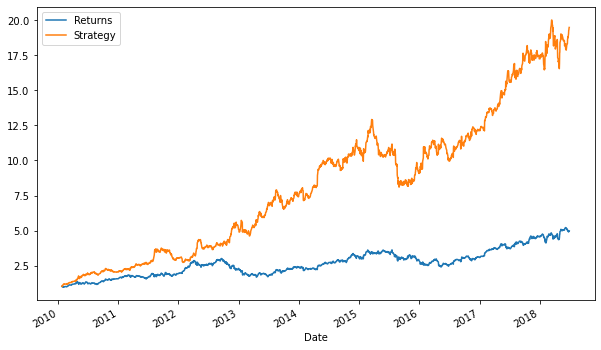

In [137]:
data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));